In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

### Read in cleaned data

In [2]:
data = pd.read_csv('twitterData')
data.tweeted_at = pd.to_datetime(data.tweeted_at)
data.created_at = pd.to_datetime(data.created_at)

### This is how the likes compare for a single indvidual across time

The tweet distribution plot for user: 67722263


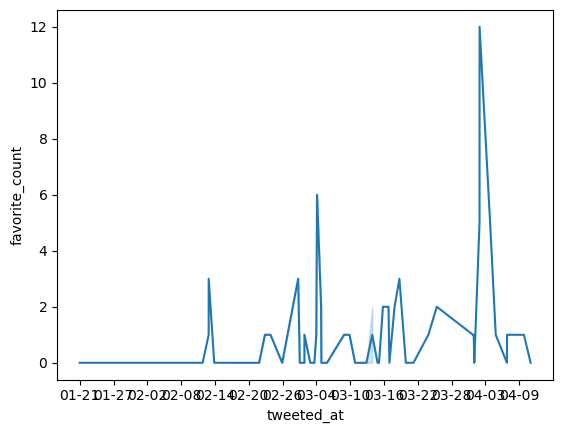

In [3]:
rand_id = data.sample().user_id.iloc[0]
example = data.query('user_id == @rand_id')
print('The tweet distribution plot for user:',rand_id)

a = sns.lineplot(data = example, x='tweeted_at',y='favorite_count')
a.xaxis.set_major_locator(ticker.IndexLocator(6,0))
a.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

### Let see which days we pulled tweets from

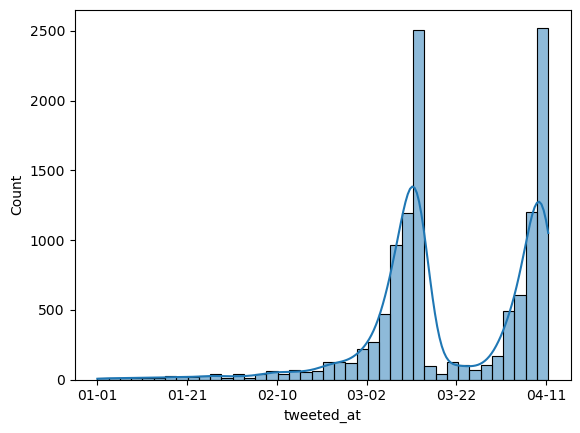

In [4]:
b = sns.histplot(data = data, x='tweeted_at',kde=True)
b.xaxis.set_major_locator(ticker.IndexLocator(20,0))
b.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

It looks like this due to the two sample periods chosen, one in late February and another in April

In [5]:
userSummary = data.groupby('user_id').mean()
userSummary.head(5)

,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,possibly_sensitive,followers_count,friends_count,favorites_count,verified,statuses_count,has_media,has_user_mentions,hourDiff
user_id,,,,,,,,,,,,,
1550461,0.172414,0.068966,0.310345,3.586207,0.0,1076.000000,1027.000000,755.000000,0.0,6378.000000,0.0,0.0,68.137931
14186393,0.211538,0.230769,1.076923,7.038462,0.0,3031.000000,5061.000000,335011.807692,0.0,914796.000000,0.0,0.0,68.288462
14425338,0.049020,0.009804,0.000000,0.852941,0.0,651.637255,3356.254902,4944.715686,0.0,13790.539216,0.0,0.0,733.813725
14427985,0.222222,0.000000,0.000000,0.777778,0.0,158.000000,1846.000000,145.000000,0.0,116.000000,0.0,0.0,963.333333
14832751,0.395349,0.023256,2.465116,40.348837,0.0,11325.000000,981.000000,630.000000,1.0,40828.000000,0.0,0.0,166.279070


In [6]:
max(userSummary.followers_count)#.value_counts

2099701.0

0.07956658590340317


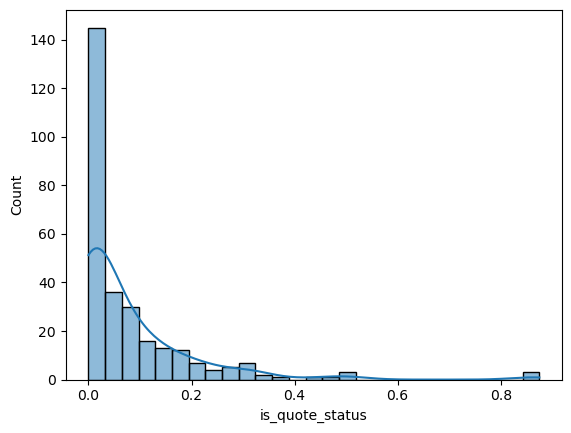

In [7]:
print(sum(userSummary.is_quote_status)/len(userSummary.is_quote_status))
c = sns.histplot(data = userSummary ,x='is_quote_status',kde=True)

Most people don't tweet in response to other tweets the majority of the time. In our sample, about 8% of of the tweets are in reply to other tweets. In fact, lets look at all the summary statistics for the users.

In [8]:
userSummary.describe()

,in_reply_to_screen_name,is_quote_status,retweet_count,favorite_count,possibly_sensitive,followers_count,friends_count,favorites_count,verified,statuses_count,has_media,has_user_mentions,hourDiff
count,286.000000,286.000000,286.000000,286.000000,286.000000,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.0,286.0,286.000000
mean,0.362188,0.079567,1.024322,10.995940,0.014166,1.163255e+04,1102.642097,20881.684811,0.118881,19473.633158,0.0,0.0,282.953084
std,0.349465,0.128779,4.552824,81.006626,0.117637,1.248570e+05,2736.495269,40620.191950,0.324216,66394.283893,0.0,0.0,330.312158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,4.000000,0.0,0.0,0.000000
25%,0.061224,0.000000,0.000000,0.761176,0.000000,1.352500e+02,150.750000,760.250000,0.000000,1560.000000,0.0,0.0,68.783013
50%,0.236069,0.025709,0.087302,1.647516,0.000000,4.507500e+02,410.500000,4817.500000,0.000000,5548.000000,0.0,0.0,149.019871
75%,0.639091,0.110507,0.516859,4.309362,0.000000,1.805325e+03,1030.750000,20853.465190,0.000000,14746.000000,0.0,0.0,365.277778
max,1.000000,0.875000,64.000000,1341.750000,1.000000,2.099701e+06,35680.000000,335011.807692,1.000000,914796.000000,0.0,0.0,1675.125000


There are many comments to be made about these:

    1. The average user's tweet gets 11 likes, however this is heavily skewed becuase the standard deviation is 81 likes, with at least one user averaging 1341 likes per tweet.
    1. Most users rarely get retweets, and more than 25% of them never recieved a retweet during the entire sample.
    1. 75% of users have over 100 followers
    1. One user has tweeted over 900K times

In [9]:
data.describe()

,retweet_count,favorite_count,possibly_sensitive,user_id,followers_count,friends_count,favorites_count,statuses_count,hourDiff
count,12090.000000,12090.000000,5623.000000,1.209000e+04,1.209000e+04,12090.000000,12090.000000,12090.000000,12090.000000
mean,0.933333,11.294458,0.010315,6.243237e+17,1.252508e+04,1220.803309,20398.164930,20599.000496,271.341026
std,9.072334,140.561244,0.101046,6.862003e+17,1.326362e+05,2940.180966,40909.545462,70836.589540,363.842133
min,0.000000,0.000000,0.000000,1.550461e+06,0.000000e+00,1.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,2.734675e+08,1.560000e+02,179.000000,807.000000,1994.000000,51.000000
50%,0.000000,1.000000,0.000000,3.183874e+09,4.910000e+02,433.000000,5158.000000,6028.000000,131.000000
75%,0.000000,2.000000,0.000000,1.409697e+18,2.066000e+03,1075.000000,19276.000000,16077.000000,288.000000
max,590.000000,10351.000000,1.000000,1.644369e+18,2.099701e+06,35680.000000,335012.000000,914796.000000,2323.000000


## What's the distribution of times between tweets

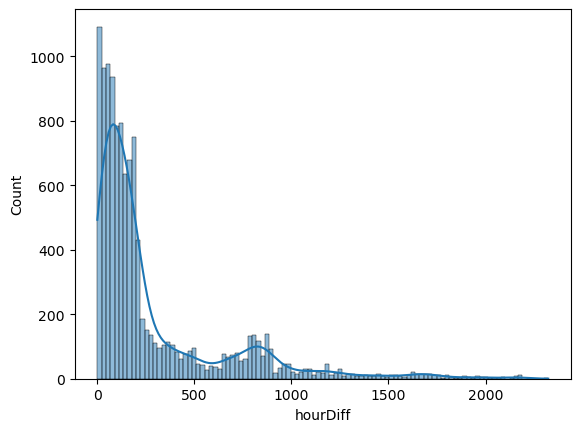

In [27]:
e = sns.histplot(data = data.query('hourDiff > 0') ,x='hourDiff',kde=True)

So we can see that more than 50% of the tweets happen within a week of the previous tweet

### How are the columns related one to another

<AxesSubplot:>

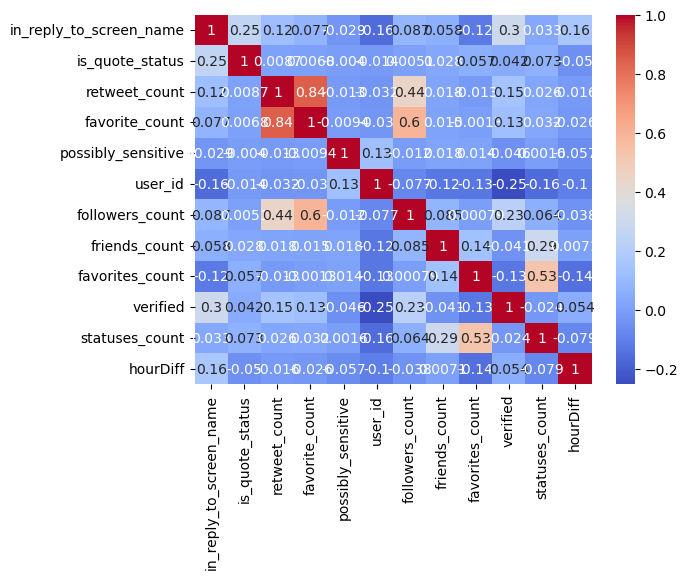

In [29]:
corr= data.drop(columns=['has_media','has_user_mentions']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)